In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
from os import path
from PIL import Image, ImageFilter, ImageDraw
from tqdm import tqdm
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
# from scipy import interp interp has been removed
from numpy import interp

from itertools import cycle
import pandas as pd
import seaborn as sn
import shutil
from PIL import ImageEnhance
from sklearn.model_selection import train_test_split

In [2]:
import tensorflow as tf
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, ReLU, Dropout, Dense, Flatten
from tensorflow.keras import Model

In [ ]:
# data_path = "D:\ml_projects\pothole\Pothole.zip"


In [3]:
path = os.getcwd()
print(path)

d:\ml_projects\pothole


Extract Zip

In [ ]:
import zipfile
import os

# List of zip file paths
zip_paths = [
    r'D:\ml_projects\pothole\Pothole.zip'
]

# Destination folder to extract files into
extract_path = r'D:\ml_projects\pothole\pothole_extract'

# Create the extraction folder if it doesn't exist
os.makedirs(extract_path, exist_ok=True)

# Loop through zip files and extract contents
for zip_path in zip_paths:
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
        extracted_files = zip_ref.namelist()
        print(f"Extracted files from {zip_path}:")
        for file in extracted_files:
            print(" -", file)


In [4]:
# print("Extracted contents:", os.listdir(extract_path))
# data_path = ['D:\ml_projects\pothole\pothole_extract\normal','D:\ml_projects\pothole\pothole_extract\potholes']

path='D:\ml_projects\pothole\pothole_extract'

Training Class Assignement

In [5]:
os.chdir(path)
path = os.getcwd()
training_classes = [f.name for f in os.scandir(path) if f.is_dir()]
print(training_classes)
# os.chdir(data_pa)
# print(data_path)

['manhole', 'normal', 'potholes']


In [6]:
os.getcwd()

'D:\\ml_projects\\pothole\\pothole_extract'

Count-Each-Section

In [10]:
#counting the number of images in each class
def counters(training_class):
   old_dir=os.getcwd()
   for names in training_class:
    new_path=names
    full_path = os.path.join(path, new_path)

     # Change to the new path
    os.chdir(full_path)
    count=0
    for images in os.listdir():
        count+=1
    print(names," : ",count," images")
   os.chdir(old_dir)


In [11]:
#counting intially
counters(training_class=training_classes)

manhole  :  345  images
normal  :  1408  images
potholes  :  1316  images


##Data Augmentation

###Rotate

In [12]:
# def rotateImages(folder):
#   '''
#    Applying Rotation to the images for data augumentation
#   '''
#   previous_path = os.getcwd()
#   os.chdir(folder)
#   current_path = os.getcwd()

#   for image in os.listdir(current_path):
#     # check if the image is already rotated.
#     if (image.find("rot") == -1):
#       img = Image.open(image)
#       # Convert image to RGB if it's in palette or RGBA mode
#       if img.mode in ('P', 'RGBA'):
#           img = img.convert('RGB')
#       # get the image name
#       img_name = list(image.split("."))[0]
#       rotimg = img.rotate(90)
#       # saving the image with its rotation information as well.
#       rotimg.save(img_name+"rot"+str(90)+".jpg")
#       img.close()
#   os.chdir(previous_path)


def rotateImages(folder, angle=90):
    '''
    Apply rotation to images for data augmentation.

    Args:
        folder (str): Path to the folder containing images.
        angle (int, optional): Angle to rotate images. Default is 90 degrees.
    '''
    previous_path = os.getcwd()
    os.chdir(folder)
    current_path = os.getcwd()

    # Define common image extensions
    # valid_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.gif', '.tiff')
    valid_extensions = ('.jpg')

    for image_name in os.listdir(current_path):
        if image_name.lower().endswith(valid_extensions):
            # Skip if already rotated
             if all(x not in image_name for x in ["rot", "blur", "Brightness", "flip"]):
                with Image.open(image_name) as img:
                    # Convert image to RGB if needed
                    if img.mode in ('P', 'RGBA'):
                        img = img.convert('RGB')

                    img_name = os.path.splitext(image_name)[0]
                    rot_img = img.rotate(angle)

                    rot_img.save(f"{img_name}rot{angle}.jpg")
    os.chdir(previous_path)


###Blur

In [13]:
# def addBlur(folder):
#   '''
#     Adds Blur to the images.
#   '''
#   previous_path = os.getcwd()
#   os.chdir(folder)
#   current_path = os.getcwd()

#   for image in (os.listdir(current_path)):
#     if (image.find("rot") == -1 and image.find("blur") == -1 and image.find("Brightness") == -1 and image.find("flip") == -1): # Avoid re-blurring or blurring augmented images
#       img = Image.open(image)
#       # Convert image to RGB if it's in palette or RGBA mode
#       if img.mode in ('P', 'RGBA'):
#           img = img.convert('RGB')
#       # adds blur to the image using ImageFilter.Blur
#       blured_image = img.filter(ImageFilter.BLUR)
#       # get the image name
#       img_name = list(image.split("."))[0]
#       # saving the image by adding the blur feature.
#       blured_image.save(img_name+"blur.jpg")

#   os.chdir(previous_path)



def addBlur(folder):
    '''
    Adds blur effect to images in the specified folder.

    Args:
        folder (str): Path to the folder containing images.
    '''
    previous_path = os.getcwd()
    os.chdir(folder)
    current_path = os.getcwd()

    # valid_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.gif', '.tiff')
    valid_extensions = ('.jpg')

    for image_name in os.listdir(current_path):
        if image_name.lower().endswith(valid_extensions):
            # Avoid re-blurring or blurring augmented images
            if all(x not in image_name for x in ["rot", "blur", "Brightness", "flip"]):
                with Image.open(image_name) as img:
                    if img.mode in ('P', 'RGBA'):
                        img = img.convert('RGB')
                    blurred_image = img.filter(ImageFilter.BLUR)

                    img_name, _ = os.path.splitext(image_name)
                    blurred_image.save(f"{img_name}blur.jpg")

    os.chdir(previous_path)


###Brightness

In [14]:
# def Brightness(folder):
#   '''
#     Adds Blur to the images.
#   '''
#   previous_path = os.getcwd()
#   os.chdir(folder)
#   current_path = os.getcwd()

#   for image in (os.listdir(current_path)):
#     if (image.find("rot") == -1 and image.find("blur") == -1 and image.find("Brightness") == -1 and image.find("flip") == -1): # Avoid re-brightening or brightened augmented images
#         img = Image.open(image)  # Open the image using the image path
#         # Convert image to RGB if it's in palette or RGBA mode
#         if img.mode in ('P', 'RGBA'):
#             img = img.convert('RGB')
#         enhancer = ImageEnhance.Brightness(img)  # Pass the image object, not the path

#         # Change the brightness (1.0 means original brightness)
#         brightness_factor = 1.5  # Increase brightness by 50%
#         img_enhanced = enhancer.enhance(brightness_factor)

#          # Increase brightness by 50%
#         brightened_image = enhancer.enhance(1.5)
#       # get the image name
#         img_name = list(image.split("."))[0]
#       # saving the image by adding the blur feature.
#         brightened_image.save(img_name+"Brightness.jpg")

#   os.chdir(previous_path)

def Brightness(folder):
    '''
    Increases brightness of images in the specified folder by 50%.

    Args:
        folder (str): Path to the folder containing images.
    '''
    previous_path = os.getcwd()
    os.chdir(folder)
    current_path = os.getcwd()

    # valid_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.gif', '.tiff')
    valid_extensions = ('.jpg')

    for image_name in os.listdir(current_path):
        if image_name.lower().endswith(valid_extensions):
            # Avoid re-brightening or brightened augmented images
            if all(x not in image_name for x in ["rot", "blur", "Brightness", "flip"]):
                with Image.open(image_name) as img:
                    if img.mode in ('P', 'RGBA'):
                        img = img.convert('RGB')

                    enhancer = ImageEnhance.Brightness(img)
                    brightened_image = enhancer.enhance(1.5)  # 50% brighter

                    img_name, _ = os.path.splitext(image_name)
                    brightened_image.save(f"{img_name}Brightness.jpg")

    os.chdir(previous_path)

In [22]:

os.getcwd()
os.chdir(path)

In [15]:
training_classes

['manhole', 'normal', 'potholes']

Do-Data-Augmentation

In [ ]:
path=os.getcwd()
# runList=[ 'potholes']
for names in training_classes:
    new_path=names
    full_path = os.path.join(path, new_path)
    # full_path=
    rotateImages(full_path)
    addBlur(full_path)
    Brightness(full_path)


used

In [17]:
# Correctly set the path to your manhole images folder
path = r'D:\ml_projects\pothole\pothole_extract'
manhole_folder_path = os.path.join(path, 'manhole')

# Check if the directory exists before proceeding
if os.path.exists(manhole_folder_path):
    # This loop will only process the 'manholes' folder
    print(f"Applying augmentation to manhole images in: {manhole_folder_path}")
    rotateImages(manhole_folder_path)
    addBlur(manhole_folder_path)
    Brightness(manhole_folder_path)
    
    print("Augmentation for manhole images completed.")
else:
    print(f"Directory not found: {manhole_folder_path}. Please check your path.")

Applying augmentation to manhole images in: D:\ml_projects\pothole\pothole_extract\manhole
Augmentation for manhole images completed.


In [ ]:

# os.getcwd()
# os.chdir("/content/drive/MyDrive/Images")

EDA

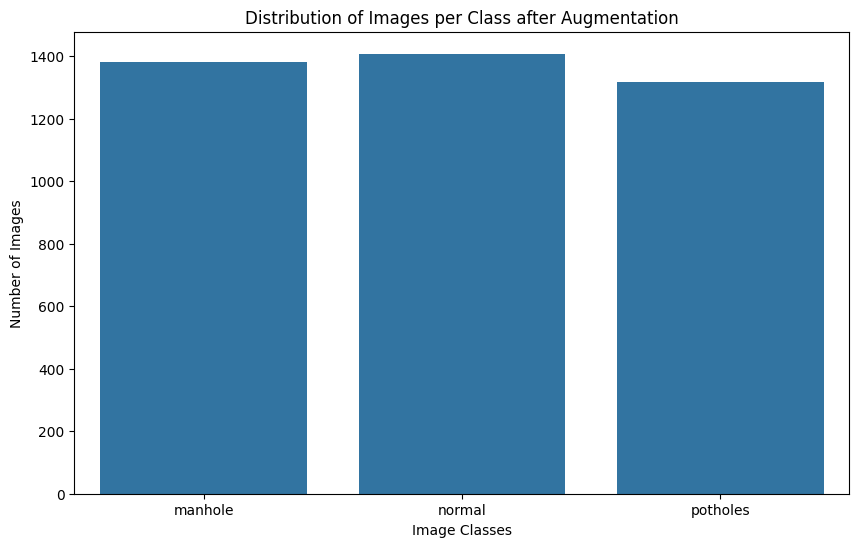

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Get the counts of images in each class
image_counts = {}
path = os.getcwd() # Assuming path is still the base directory for images

for names in training_classes:
    folder_path = os.path.join(path, names)
    count = 0
    if os.path.isdir(folder_path):
        for item in os.listdir(folder_path):
            item_path = os.path.join(folder_path, item)
            if os.path.isfile(item_path):
                count += 1
    image_counts[names] = count

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=list(image_counts.keys()), y=list(image_counts.values()))
plt.xlabel("Image Classes")
plt.ylabel("Number of Images")
plt.title("Distribution of Images per Class after Augmentation")
plt.show()

In [19]:
image_counts

{'manhole': 1380, 'normal': 1408, 'potholes': 1316}

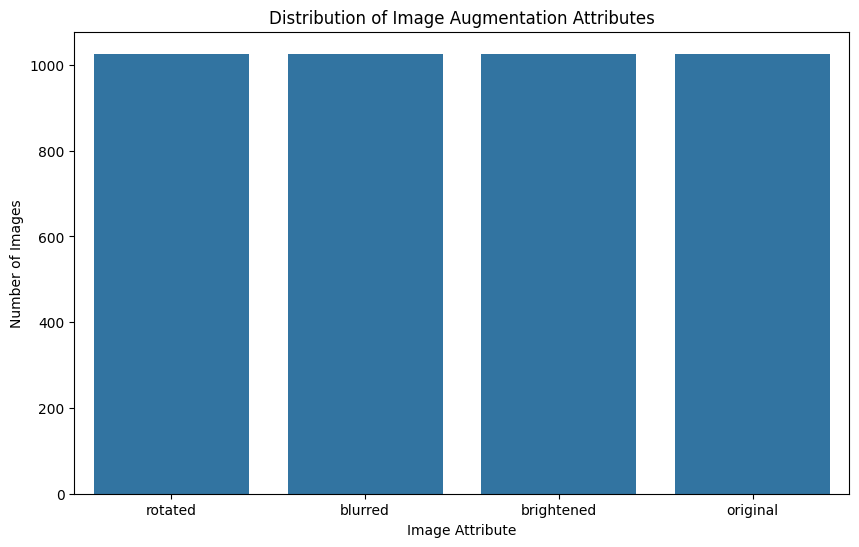

Attribute Counts:
rotated: 1026
blurred: 1026
brightened: 1026
original: 1026


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Assuming 'path' is the base directory for your image folders
# Assuming 'training_classes' is the list of your image class folders

attribute_counts = {
    "rotated": 0,
    "blurred": 0,
    "brightened": 0,
    # "flipped": 0,
    "original": 0
}

# Iterate through each training class folder
for class_name in training_classes:
    folder_path = os.path.join(path, class_name)
    if os.path.isdir(folder_path):
        # Iterate through each image file in the folder
        for image_name in os.listdir(folder_path):
            # Check for augmentation attributes in the filename
            is_augmented = False
            if "rot" in image_name:
                attribute_counts["rotated"] += 1
                is_augmented = True
            if "blur" in image_name:
                attribute_counts["blurred"] += 1
                is_augmented = True
            if "Brightness" in image_name:
                attribute_counts["brightened"] += 1
                is_augmented = True
            # if "flip" in image_name:
            #     attribute_counts["flipped"] += 1
            #     is_augmented = True

            # If the image does not have any of the augmentation attributes, count as original
            if not is_augmented:
                 attribute_counts["original"] += 1


# Create a bar plot for the attribute counts
plt.figure(figsize=(10, 6))
sns.barplot(x=list(attribute_counts.keys()), y=list(attribute_counts.values()))
plt.xlabel("Image Attribute")
plt.ylabel("Number of Images")
plt.title("Distribution of Image Augmentation Attributes")
plt.show()

print("Attribute Counts:")
for attribute, count in attribute_counts.items():
    print(f"{attribute}: {count}")

Rename with -m,-p,-n

In [21]:
import os

def rename_images(folder_path, prefix):
    # Change to the specified folder
    os.chdir(folder_path)
    print(f"Renaming images in: {os.getcwd()}")
    
    # Get all files in the directory
    files = os.listdir('.')
    
    image_count = 0
    # Iterate through the files
    for old_name in files:
        # Construct the new filename with the specified prefix
        # This assumes your augmented files already have suffixes like 'blur', 'rot90'
        # Example: '1.jpg' -> 'p-1.jpg', '1blur.jpg' -> 'p-1blur.jpg'
        
        # Split the filename and extension
        name, ext = os.path.splitext(old_name)
        
        # Check if the file is an image and not already renamed
        if ext.lower() in ['.jpg', '.jpeg', '.png'] and not name.startswith(prefix):
            image_count += 1
            # The new name is a combination of the prefix and the old name
            new_name = f"{prefix}{name}{ext}"
            os.rename(old_name, new_name)
            print(f"Renamed '{old_name}' to '{new_name}'")

# Specify the paths to your two folders
pothole_folder_path = 'D:\ml_projects\pothole\pothole_extract\potholes'
normal_folder_path = r'D:\ml_projects\pothole\pothole_extract\normal' # Assuming you have a folder named 'Normal'
manhole_folder_path=r"D:\ml_projects\pothole\pothole_extract\manhole"
# Rename images in the Pothole folder with 'p-' prefix
# rename_images(pothole_folder_path, 'p-')

# Change back to the main directory
# os.chdir('../..')

# Rename images in the Normal folder with 'n-' prefix
# rename_images(normal_folder_path, 'n-')
rename_images(manhole_folder_path, 'm-')
# Change back to the main directory
# os.chdir('../..')

Renaming images in: D:\ml_projects\pothole\pothole_extract\manhole
Renamed 'close0.jpg' to 'm-close0.jpg'
Renamed 'close0blur.jpg' to 'm-close0blur.jpg'
Renamed 'close0Brightness.jpg' to 'm-close0Brightness.jpg'
Renamed 'close0rot90.jpg' to 'm-close0rot90.jpg'
Renamed 'close1.jpg' to 'm-close1.jpg'
Renamed 'close10.jpg' to 'm-close10.jpg'
Renamed 'close101.jpg' to 'm-close101.jpg'
Renamed 'close101blur.jpg' to 'm-close101blur.jpg'
Renamed 'close101Brightness.jpg' to 'm-close101Brightness.jpg'
Renamed 'close101rot90.jpg' to 'm-close101rot90.jpg'
Renamed 'close102.jpg' to 'm-close102.jpg'
Renamed 'close102blur.jpg' to 'm-close102blur.jpg'
Renamed 'close102Brightness.jpg' to 'm-close102Brightness.jpg'
Renamed 'close102rot90.jpg' to 'm-close102rot90.jpg'
Renamed 'close103.jpg' to 'm-close103.jpg'
Renamed 'close103blur.jpg' to 'm-close103blur.jpg'
Renamed 'close103Brightness.jpg' to 'm-close103Brightness.jpg'
Renamed 'close103rot90.jpg' to 'm-close103rot90.jpg'
Renamed 'close104.jpg' to 'm-

In [44]:
img_label = {}

# valid_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.gif', '.tiff')
valid_extensions = ('.jpg')

for image in os.listdir():
    if image.lower().endswith(valid_extensions):
        if image[0].lower() == 'p':
            img_label[image] = np.asarray([1, 0], dtype=np.float32)
        elif image[0].lower() == 'n':
            img_label[image] = np.asarray([0, 1], dtype=np.float32)

One-Hot-Encoding

In [22]:
img_label = {}

# valid_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.gif', '.tiff')
valid_extensions = ('.jpg')

for image in os.listdir():
    if image.lower().endswith(valid_extensions):
        if image[0].lower() == 'p':
            img_label[image] = np.asarray([1, 0, 0], dtype=np.float32)
        elif image[0].lower() == 'm':
            img_label[image] = np.asarray([0, 1, 0], dtype=np.float32)
        elif image[0].lower() == 'n':
            img_label[image] = np.asarray([0, 0, 1], dtype=np.float32)

In [23]:
img_label

{'m-close0.jpg': array([0., 1., 0.], dtype=float32),
 'm-close0blur.jpg': array([0., 1., 0.], dtype=float32),
 'm-close0Brightness.jpg': array([0., 1., 0.], dtype=float32),
 'm-close0rot90.jpg': array([0., 1., 0.], dtype=float32),
 'm-close1.jpg': array([0., 1., 0.], dtype=float32),
 'm-close10.jpg': array([0., 1., 0.], dtype=float32),
 'm-close101.jpg': array([0., 1., 0.], dtype=float32),
 'm-close101blur.jpg': array([0., 1., 0.], dtype=float32),
 'm-close101Brightness.jpg': array([0., 1., 0.], dtype=float32),
 'm-close101rot90.jpg': array([0., 1., 0.], dtype=float32),
 'm-close102.jpg': array([0., 1., 0.], dtype=float32),
 'm-close102blur.jpg': array([0., 1., 0.], dtype=float32),
 'm-close102Brightness.jpg': array([0., 1., 0.], dtype=float32),
 'm-close102rot90.jpg': array([0., 1., 0.], dtype=float32),
 'm-close103.jpg': array([0., 1., 0.], dtype=float32),
 'm-close103blur.jpg': array([0., 1., 0.], dtype=float32),
 'm-close103Brightness.jpg': array([0., 1., 0.], dtype=float32),
 'm-c

In [ ]:
for image in os.listdir():
    if (image[0]=='p'):
        img_label[image] = np.asarray([1,0], dtype=np.float32)
    elif (image[0]=='n'):
        img_label[image]=np.asarray([0,1],dtype=np.float32)

In [24]:
import numpy as np
import os

# Assuming 'img_label' is a dictionary you've already defined.
img_label = {}

# valid_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.gif', '.tiff')
valid_extensions = ('.jpg')

for image in os.listdir():
    if image.lower().endswith(valid_extensions):
        if image[0].lower() == 'p':
            img_label[image] = np.asarray([1, 0, 0], dtype=np.float32)  # Pothole
        elif image[0].lower() == 'm':
            img_label[image] = np.asarray([0, 1, 0], dtype=np.float32)  # Manhole
        elif image[0].lower() == 'n':
            img_label[image] = np.asarray([0, 0, 1], dtype=np.float32)  # Normal

In [25]:
training_classes

['manhole', 'normal', 'potholes']

Preprocessing

In [26]:
def load_image(image_path):
    '''
      Converts the image to size = (299,299,3) and normalizes the data
      Args :
      image_path : str. Image path for processing the image
    '''
    img = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, (299, 299))
    # Normalizing the image
    img = tf.keras.applications.inception_v3.preprocess_input(img)
    return img, image_path

In [27]:
os.getcwd()

'D:\\ml_projects\\pothole\\pothole_extract\\manhole'

In [30]:
# Test code for checking the image shape and max value of image
os.chdir('D:\ml_projects\pothole\pothole_extract\manhole')
image, path = load_image('m-close0.jpg')
print(f"image has a shape of {image.shape}")
print(tf.reduce_max(image))
# os.chdir('/content')

image has a shape of (299, 299, 3)
tf.Tensor(0.8583385, shape=(), dtype=float32)


In [ ]:
#un used
import os
import shutil
import numpy as np
from tqdm import tqdm

# img_label = {}  # dictionary to hold image labels

def create_dataset(folder):
    previous_path = os.getcwd()
    os.chdir(folder)
    current_path = os.getcwd()

    for image in tqdm(os.listdir(current_path)):
        if not os.path.isfile(image):
            continue

        # Move the image to the main dataset folder
        shutil.move(image, "D:\ml_projects\pothole\named")

        # Assign labels based on folder name
        if 'Pothole' in folder:
            img_label[image] = np.asarray([0, 1], dtype=np.float32)  # Pothole → class 1
        else:
            img_label[image] = np.asarray([1, 0], dtype=np.float32)  # Normal → class 0

    os.chdir(previous_path)


Train test split

In [25]:
img_name_train, img_name_val, output_label_train, output_label_val = train_test_split(
    list(img_label.keys()),
    list(img_label.values()),
    test_size=0.1,
    random_state=0
)

print(f'Total images processed: {len(img_label)}')
print(f'Length of training images = {len(img_name_train)}')
print(f'Length of training labels = {len(output_label_train)}')
print(f'Length of validating images = {len(img_name_val)}')
print(f'Length of validating labels = {len(output_label_val)}')

Total images processed: 1408
Length of training images = 1267
Length of training labels = 1267
Length of validating images = 141
Length of validating labels = 141


In [27]:
full_path

'p-1.jpg\\n-pothole_extract268.jpg'

Train test split and preprocessing

In [30]:
import os
import numpy as np
import tensorflow as tf
from tqdm import tqdm

# ... (previous code remains the same)

def load_and_preprocess(image_names, output_labels, image_array, label_array, desc):
    """Loads and preprocesses images into NumPy arrays with error handling."""
    
    # We will track which images are successfully loaded
    loaded_image_names = []
    loaded_output_labels = []
    
    for i, image_name in enumerate(tqdm(image_names, desc=desc)):
        folder = image_folder_map.get(image_name)
        if folder:
            full_path = os.path.join(base_path, folder, image_name)
            
            try:
                img_raw = tf.io.read_file(full_path)
                
                # Attempt to decode as JPEG
                try:
                    img = tf.image.decode_jpeg(img_raw, channels=3)
                except tf.errors.InvalidArgumentError:
                    # If JPEG fails, try decoding as PNG
                    try:
                        img = tf.image.decode_png(img_raw, channels=3)
                    except tf.errors.InvalidArgumentError:
                        print(f"Skipping image {image_name}: Unsupported format or corrupted.")
                        continue # Skip this image

                img = tf.image.resize(img, (IMG_SHAPE, IMG_SHAPE))
                img = tf.keras.applications.inception_v3.preprocess_input(img)
                
                image_array[len(loaded_image_names)] = img
                label_array[len(loaded_image_names)] = output_labels[i]
                loaded_image_names.append(image_name)
                loaded_output_labels.append(output_labels[i])
                
            except tf.errors.NotFoundError:
                print(f"Skipping image {image_name}: File not found.")
            except Exception as e:
                print(f"Skipping image {image_name} due to an unexpected error: {e}")
        else:
            print(f"Error: Could not determine folder for image {image_name}")

# Re-initialize NumPy arrays with the correct size after filtering
num_train_images = len(img_name_train)
train_images = np.ndarray(shape=(num_train_images, IMG_SHAPE, IMG_SHAPE, channels), dtype=np.float32)
train_labels = np.ndarray(shape=(num_train_images, 2), dtype=np.float32)

num_val_images = len(img_name_val)
val_images = np.ndarray(shape=(num_val_images, IMG_SHAPE, IMG_SHAPE, channels), dtype=np.float32)
val_labels = np.ndarray(shape=(num_val_images, 2), dtype=np.float32)

# Load and preprocess training images
load_and_preprocess(img_name_train, output_label_train, train_images, train_labels, "Loading Training Data")

# Load and preprocess validation images
load_and_preprocess(img_name_val, output_label_val, val_images, val_labels, "Loading Validation Data")

print("Image arrays created successfully!")
print(f"Shape of train_images: {train_images.shape}")
print(f"Shape of val_images: {val_images.shape}")

Loading Training Data:  10%|▉         | 123/1267 [00:00<00:07, 148.15it/s]

Skipping image n-pothole_extract209.jpg: Unsupported format or corrupted.


Loading Training Data:  14%|█▍        | 178/1267 [00:02<00:23, 47.24it/s] 

Skipping image n-pothole_extract303.jpg: Unsupported format or corrupted.


Loading Training Data:  24%|██▍       | 309/1267 [00:06<00:28, 34.15it/s]

Skipping image n-pothole_extract298.jpg: Unsupported format or corrupted.


Loading Training Data:  43%|████▎     | 551/1267 [00:14<00:22, 32.10it/s]

Skipping image n-pothole_extract109.jpg: Unsupported format or corrupted.


Loading Training Data:  48%|████▊     | 611/1267 [00:16<00:21, 31.00it/s]

Skipping image n-pothole_extract210.jpg: Unsupported format or corrupted.


Loading Training Data:  58%|█████▊    | 740/1267 [00:20<00:15, 33.30it/s]

Skipping image n-pothole_extract115.jpg: Unsupported format or corrupted.
Skipping image n-pothole_extract62.jpg: Unsupported format or corrupted.


Loading Training Data:  89%|████████▊ | 1122/1267 [00:33<00:04, 31.47it/s]

Skipping image n-pothole_extract201.jpg: Unsupported format or corrupted.


Loading Training Data:  96%|█████████▌| 1213/1267 [00:36<00:01, 30.63it/s]

Skipping image n-pothole_extract86.jpg: Unsupported format or corrupted.


Loading Validation Data:   6%|▌         | 8/141 [00:00<00:03, 33.52it/s]

Skipping image n-pothole_extract238.jpg: Unsupported format or corrupted.


Loading Validation Data:  41%|████      | 58/141 [00:02<00:02, 30.93it/s]

Skipping image n-pothole_extract189.jpg: Unsupported format or corrupted.


Loading Validation Data:  55%|█████▌    | 78/141 [00:02<00:01, 31.91it/s]

Skipping image n-pothole_extract65.jpg: Unsupported format or corrupted.


Loading Validation Data: 100%|██████████| 141/141 [00:04<00:00, 30.35it/s]

Image arrays created successfully!
Shape of train_images: (1267, 299, 299, 3)
Shape of val_images: (141, 299, 299, 3)


In [31]:
import tensorflow as tf
print(f"TensorFlow Version: {tf.__version__}")

TensorFlow Version: 2.19.0


Compile InceptionV3

In [32]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Load the pre-trained InceptionV3 model, excluding the top classification layer
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the layers of the base model to prevent them from being trained
for layer in base_model.layers:
    layer.trainable = False

# Add new layers for your specific pothole/normal classification task
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Convert the features to a single vector
x = Dense(1024, activation='relu')(x)  # A new fully connected layer
predictions = Dense(2, activation='softmax')(x)  # The final classification layer

# Create the full model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 299, 299,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 149, 149,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 149, 149,  │         96 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 149, 149,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 147, 147,  │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │         96 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 147, 147,  │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │        192 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 73, 73,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 73, 73,    │      5,120 │ max_pooling2d[0]… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 73, 73,    │        240 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 73, 73,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 71, 71,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 71, 71,    │        576 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 71, 71,    │          0 │ batch_normalizat

 Total params: 23,903,010 (91.18 MB)

 Trainable params: 2,100,226 (8.01 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [40]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# Define the image shape
IMG_SHAPE = 299

# 1. Load the pre-trained InceptionV3 model
# Set 'include_top=False' to exclude the original classification layer
# and specify the input shape
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(IMG_SHAPE, IMG_SHAPE, 3))

# 2. Freeze the base model's layers
# This prevents the pre-trained weights from being updated during the first few epochs
for layer in base_model.layers:
    layer.trainable = False

# 3. Add your new custom classification layers
# Start with the output of the base model
x = base_model.output

# Use GlobalAveragePooling2D to flatten the feature maps
x = GlobalAveragePooling2D()(x)

# Add a dense layer for further feature processing
# This acts as a bottleneck and helps the model learn to classify your specific images
x = Dense(1024, activation='relu')(x)

# Add the final output layer with 2 neurons for your two classes
# 'softmax' activation is used for multi-class classification
predictions = Dense(2, activation='softmax')(x)

# 4. Create the full model
model = Model(inputs=base_model.input, outputs=predictions)

# 5. Compile the model with a very low learning rate
# A learning rate of 0.00001 is a safe bet to prevent NaN loss
adam_optimizer = Adam(learning_rate=0.00001)

model.compile(
    optimizer=adam_optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Display the model's architecture
model.summary()

# 6. Train the model
# Use your prepared train_images and val_images
history = model.fit(
    train_images,
    train_labels,
    epochs=10,
    batch_size=32,
    validation_data=(val_images, val_labels)
)

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 299, 299,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_94 (Conv2D)  │ (None, 149, 149,  │        864 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 149, 149,  │         96 │ conv2d_94[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_94       │ (None, 149, 149,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_95 (Conv2D)  │ (None, 147, 147,  │      9,216 │ activation_94[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │         96 │ conv2d_95[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_95       │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_96 (Conv2D)  │ (None, 147, 147,  │     18,432 │ activation_95[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │        192 │ conv2d_96[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_96       │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 73, 73,    │          0 │ activation_96[0]… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_97 (Conv2D)  │ (None, 73, 73,    │      5,120 │ max_pooling2d_4[… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 73, 73,    │        240 │ conv2d_97[0][0]   │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_97       │ (None, 73, 73,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_98 (Conv2D)  │ (None, 71, 71,    │    138,240 │ activation_97[0]… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 71, 71,    │        576 │ conv2d_98[0][0]   │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_98       │ (None, 71, 71,    │          0 │ batch_normalizat

 Total params: 23,903,010 (91.18 MB)

 Trainable params: 2,100,226 (8.01 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 76s 2s/step - accuracy: 0.5955 - loss: nan - val_accuracy: 0.0213 - val_loss: nan
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - accuracy: 0.0030 - loss: nan - val_accuracy: 0.0213 - val_loss: nan
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 70s 2s/step - accuracy: 0.0019 - loss: nan - val_accuracy: 0.0213 - val_loss: nan
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.0042 - loss: nan - val_accuracy: 0.0213 - val_loss: nan
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 68s 2s/step - accuracy: 0.0014 - loss: nan - val_accuracy: 0.0213 - val_loss: nan
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 69s 2s/step - accuracy: 0.0018 - loss: nan - val_accuracy: 0.0213 - val_loss: nan
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 64s 2s/step - accuracy: 0.0050 - loss: nan - val_accuracy: 0.0213 - val_loss: nan
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 64s 2s/step - accuracy: 0.0050 - loss: nan - val_accuracy: 0.0213 - val_loss: nan
Epoch 9/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 54

In [37]:
from tensorflow.keras.optimizers import Adam
EPOCHS = 10
BATCH_SIZE = 32
# A much smaller learning rate, for example 0.00001
# The default Adam learning rate is 0.001
adam_optimizer = Adam(learning_rate=0.00001)

model.compile(
    optimizer=adam_optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Now, retrain the model with the adjusted learning rate
history = model.fit(
    train_images,
    train_labels,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(val_images, val_labels)
)

Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 44s 931ms/step - accuracy: 0.0071 - loss: nan - val_accuracy: 0.0213 - val_loss: nan
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 35s 884ms/step - accuracy: 0.0031 - loss: nan - val_accuracy: 0.0213 - val_loss: nan
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 35s 885ms/step - accuracy: 0.0026 - loss: nan - val_accuracy: 0.0213 - val_loss: nan
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.0025 - loss: nan - val_accuracy: 0.0213 - val_loss: nan
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 69s 2s/step - accuracy: 0.0014 - loss: nan - val_accuracy: 0.0213 - val_loss: nan
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.0036 - loss: nan - val_accuracy: 0.0213 - val_loss: nan
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 36s 898ms/step - accuracy: 0.0026 - loss: nan - val_accuracy: 0.0213 - val_loss: nan
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 36s 911ms/step - accuracy: 0.0057 - loss: nan - val_accuracy: 0.0213 - val_loss: nan
Epoch 9/10
40/40 ━━━━━━━━

In [33]:
EPOCHS = 10
BATCH_SIZE = 32

history = model.fit(
    train_images,
    train_labels,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(val_images, val_labels)
)

Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 48s 933ms/step - accuracy: 0.2466 - loss: nan - val_accuracy: 0.0213 - val_loss: nan
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 35s 877ms/step - accuracy: 0.0039 - loss: nan - val_accuracy: 0.0213 - val_loss: nan
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 35s 873ms/step - accuracy: 0.0027 - loss: nan - val_accuracy: 0.0213 - val_loss: nan
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 35s 871ms/step - accuracy: 0.0038 - loss: nan - val_accuracy: 0.0213 - val_loss: nan
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 35s 871ms/step - accuracy: 0.0042 - loss: nan - val_accuracy: 0.0213 - val_loss: nan
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 35s 886ms/step - accuracy: 0.0043 - loss: nan - val_accuracy: 0.0213 - val_loss: nan
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 35s 878ms/step - accuracy: 0.0054 - loss: nan - val_accuracy: 0.0213 - val_loss: nan
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 35s 868ms/step - accuracy: 0.0076 - loss: nan - val_accuracy: 0.0213 - val_loss: nan
Epoch 9/10
40/40

In [39]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# A much smaller learning rate to ensure stable training
adam_optimizer = Adam(learning_rate=0.00001)

# Recompile the model with the new, lower learning rate
model.compile(
    optimizer=adam_optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Now, retrain the model with the new learning rate
history = model.fit(
    train_images,
    train_labels,
    epochs=10, # Start with 10 epochs again to see if the loss converges
    batch_size=32,
    validation_data=(val_images, val_labels)
)

Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 70s 2s/step - accuracy: 0.0018 - loss: nan - val_accuracy: 0.0213 - val_loss: nan
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 0.0028 - loss: nan - val_accuracy: 0.0213 - val_loss: nan
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.0014 - loss: nan - val_accuracy: 0.0213 - val_loss: nan
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 69s 2s/step - accuracy: 0.0061 - loss: nan - val_accuracy: 0.0213 - val_loss: nan
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 68s 2s/step - accuracy: 0.0022 - loss: nan - val_accuracy: 0.0213 - val_loss: nan
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 65s 2s/step - accuracy: 0.0036 - loss: nan - val_accuracy: 0.0213 - val_loss: nan
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 70s 2s/step - accuracy: 9.9203e-04 - loss: nan - val_accuracy: 0.0213 - val_loss: nan
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 69s 2s/step - accuracy: 0.0018 - loss: nan - val_accuracy: 0.0213 - val_loss: nan
Epoch 9/10
40/40 ━━━━━━━━━━━━━━━━━━━

In [48]:
os.chdir('D:\ml_projects\pothole\pothole_extract')

In [49]:
os.getcwd()

'D:\\ml_projects\\pothole\\pothole_extract'

In [52]:
import os
import shutil
from PIL import Image
from tqdm import tqdm

def process_and_rename_images(folder_path, prefix):
    # Change to the specified folder
    try:
        os.chdir(folder_path)
    except FileNotFoundError:
        print(f"Folder not found: {folder_path}. Skipping.")
        return

    print(f"Processing and renaming images in: {os.getcwd()}")
    
    # Get all files in the directory
    files = os.listdir('.')
    
    # Define common image extensions
    valid_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.gif', '.tiff')
    
    renamed_count = 0
    deleted_count = 0
    
    # Iterate through the files
    for old_name in tqdm(files, desc=f"Processing {folder_path}"):
        if old_name.lower().endswith(valid_extensions):
            name, ext = os.path.splitext(old_name)

            # Use a try-except block to handle corrupted files
            try:
                # Attempt to open the image to check for corruption
                with Image.open(old_name) as img:
                    img.verify() # Verify file integrity
                
                # Check if the file is an image and not already renamed
                if not name.startswith(prefix):
                    new_name = f"{prefix}{name}{ext}"
                    os.rename(old_name, new_name)
                    renamed_count += 1
            except Exception as e:
                print(f"Deleting corrupted file '{old_name}' due to error: {e}")
                os.remove(old_name)
                deleted_count += 1
    
    print(f"Renamed {renamed_count} images.")
    print(f"Deleted {deleted_count} corrupted files.")

# --- Main script part ---
path = 'D:\\ml_projects\\pothole\\pothole_extract'
pothole_folder_path = os.path.join(path, 'potholes')
normal_folder_path = os.path.join(path, 'normal')

# Process and rename images in the Pothole folder
process_and_rename_images(pothole_folder_path, 'p-')

# Process and rename images in the Normal folder
process_and_rename_images(normal_folder_path, 'n-')

Processing and renaming images in: D:\ml_projects\pothole\pothole_extract\potholes


Processing D:\ml_projects\pothole\pothole_extract\potholes: 100%|██████████| 1317/1317 [00:26<00:00, 49.14it/s]


Renamed 0 images.
Deleted 0 corrupted files.
Processing and renaming images in: D:\ml_projects\pothole\pothole_extract\normal


Processing D:\ml_projects\pothole\pothole_extract\normal: 100%|██████████| 1408/1408 [00:01<00:00, 1226.30it/s]

Renamed 0 images.
Deleted 0 corrupted files.


## Final-Training after Solving nan problem

In [31]:
import numpy as np
import os
from tqdm import tqdm
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns

File Path and Data Initialization

In [ ]:
# Correctly set the path to the root of your project
# This should be the directory that contains the 'pothole_extract' folder
path = 'D:\\ml_projects\\pothole'
base_path = os.path.join(path, "pothole_extract")

# Define the image shape and channels
IMG_SHAPE = 299
channels = 3

# Create lists to hold valid data
train_images_list = []
train_labels_list = []
val_images_list = []
val_labels_list = []

# Assuming img_label is already populated
img_label = {}
for class_name in ['potholes', 'normal','manhole']:
    folder_path = os.path.join(base_path, class_name)
    if os.path.isdir(folder_path):
        os.chdir(folder_path)
        for image_name in os.listdir('.'):
            if image_name.lower().endswith('.jpg'):
                if 'potholes' in class_name:
                    img_label[image_name] = np.asarray([1, 0], dtype=np.float32)
                else:
                    img_label[image_name] = np.asarray([0, 1], dtype=np.float32)
os.chdir(path)

# Perform the train/test split
img_name_train, img_name_val, output_label_train, output_label_val = train_test_split(
    list(img_label.keys()),
    list(img_label.values()),
    test_size=0.1,
    random_state=0
)

In [32]:
import os
import numpy as np
from sklearn.model_selection import train_test_split

# Correctly set the path to the root of your project
# This should be the directory that contains the 'pothole_extract' folder
path = 'D:\\ml_projects\\pothole'
base_path = os.path.join(path, "pothole_extract")

# Define the image shape and channels
IMG_SHAPE = 299
channels = 3

# Create lists to hold valid data
train_images_list = []
train_labels_list = []
val_images_list = []
val_labels_list = []

# Assuming img_label is already populated
img_label = {}
for class_name in ['potholes', 'normal', 'manhole']:
    folder_path = os.path.join(base_path, class_name)
    if os.path.isdir(folder_path):
        os.chdir(folder_path)
        for image_name in os.listdir('.'):
            if image_name.lower().endswith('.jpg'):
                if 'potholes' in class_name:
                    # Pothole -> [1, 0, 0]
                    img_label[image_name] = np.asarray([1, 0, 0], dtype=np.float32)
                elif 'manhole' in class_name:
                    # Manhole -> [0, 1, 0]
                    img_label[image_name] = np.asarray([0, 1, 0], dtype=np.float32)
                else:
                    # Normal -> [0, 0, 1]
                    img_label[image_name] = np.asarray([0, 0, 1], dtype=np.float32)
os.chdir(path)

# Perform the train/test split
img_name_train, img_name_val, output_label_train, output_label_val = train_test_split(
    list(img_label.keys()),
    list(img_label.values()),
    test_size=0.1,
    random_state=0
)

Image Preprocessing Function

In [55]:
def load_and_preprocess_images(image_names, labels, images_list, labels_list, desc):
    """
    Loads, preprocesses, and appends images and labels to lists with robust error handling.
    """
    for i, image_name in enumerate(tqdm(image_names, desc=desc)):
        if image_name.lower().startswith('p'):
            folder = 'potholes'
        elif image_name.lower().startswith('n'):
            folder = 'normal'
        else:
            print(f"Skipping image {image_name}: Prefix not found.")
            continue
        
        full_path = os.path.join(base_path, folder, image_name)
        
        try:
            img_raw = tf.io.read_file(full_path)
            img = tf.image.decode_jpeg(img_raw, channels=3)
            img = tf.image.resize(img, (IMG_SHAPE, IMG_SHAPE))
            img = img / 255.0
            
            images_list.append(img)
            labels_list.append(labels[i])
        except (tf.errors.NotFoundError, tf.errors.InvalidArgumentError) as e:
            print(f"Skipping image {image_name}: {e}")
        except Exception as e:
            print(f"Skipping image {image_name} due to an unexpected error: {e}")

In [33]:
def load_and_preprocess_images(image_names, labels, images_list, labels_list, desc):
    """
    Loads, preprocesses, and appends images and labels to lists with robust error handling.
    """
    for i, image_name in enumerate(tqdm(image_names, desc=desc)):
        if image_name.lower().startswith('p'):
            folder = 'potholes'
        elif image_name.lower().startswith('m'):
            folder = 'manhole' # The manhole folder name
        elif image_name.lower().startswith('n'):
            folder = 'normal'
        else:
            print(f"Skipping image {image_name}: Prefix not found.")
            continue
        
        full_path = os.path.join(base_path, folder, image_name)
        
        try:
            img_raw = tf.io.read_file(full_path)
            img = tf.image.decode_jpeg(img_raw, channels=3)
            img = tf.image.resize(img, (IMG_SHAPE, IMG_SHAPE))
            img = img / 255.0
            
            images_list.append(img)
            labels_list.append(labels[i])
        except (tf.errors.NotFoundError, tf.errors.InvalidArgumentError) as e:
            print(f"Skipping image {image_name}: {e}")
        except Exception as e:
            print(f"Skipping image {image_name} due to an unexpected error: {e}")

 Load Data into Arrays

In [34]:
load_and_preprocess_images(img_name_train, output_label_train, train_images_list, train_labels_list, "Loading Training Data")
load_and_preprocess_images(img_name_val, output_label_val, val_images_list, val_labels_list, "Loading Validation Data")

train_images = np.array(train_images_list)
train_labels = np.array(train_labels_list)
val_images = np.array(val_images_list)
val_labels = np.array(val_labels_list)

print("Image arrays created successfully!")
print(f"Shape of train_images: {train_images.shape}")
print(f"Shape of train_labels: {train_labels.shape}")
print(f"Shape of val_images: {val_images.shape}")
print(f"Shape of val_labels: {val_labels.shape}")

Loading Training Data:   2%|▏         | 92/3693 [00:02<01:49, 32.74it/s]

Skipping image p-190.jpg: {{function_node __wrapped__DecodeJpeg_device_/job:localhost/replica:0/task:0/device:CPU:0}} Unknown image file format. One of JPEG, PNG, GIF, BMP required. [Op:DecodeJpeg]


Loading Training Data:   4%|▍         | 160/3693 [00:04<01:07, 52.18it/s]

Skipping image p-151.jpg: {{function_node __wrapped__DecodeJpeg_device_/job:localhost/replica:0/task:0/device:CPU:0}} Unknown image file format. One of JPEG, PNG, GIF, BMP required. [Op:DecodeJpeg]


Loading Training Data:   8%|▊         | 308/3693 [00:06<00:47, 71.00it/s]

Skipping image p-191.jpg: {{function_node __wrapped__DecodeJpeg_device_/job:localhost/replica:0/task:0/device:CPU:0}} Unknown image file format. One of JPEG, PNG, GIF, BMP required. [Op:DecodeJpeg]


Loading Training Data:  11%|█         | 394/3693 [00:07<00:58, 56.72it/s]

Skipping image n-pothole_extract86.jpg: {{function_node __wrapped__DecodeJpeg_device_/job:localhost/replica:0/task:0/device:CPU:0}} Unknown image file format. One of JPEG, PNG, GIF, BMP required. [Op:DecodeJpeg]


Loading Training Data:  30%|███       | 1124/3693 [00:21<00:37, 69.22it/s]

Skipping image n-pothole_extract115.jpg: {{function_node __wrapped__DecodeJpeg_device_/job:localhost/replica:0/task:0/device:CPU:0}} Unknown image file format. One of JPEG, PNG, GIF, BMP required. [Op:DecodeJpeg]


Loading Training Data:  32%|███▏      | 1184/3693 [00:22<00:32, 76.19it/s]

Skipping image p-273.jpg: {{function_node __wrapped__DecodeJpeg_device_/job:localhost/replica:0/task:0/device:CPU:0}} Unknown image file format. One of JPEG, PNG, GIF, BMP required. [Op:DecodeJpeg]


Loading Training Data:  33%|███▎      | 1222/3693 [00:22<00:30, 81.80it/s]

Skipping image n-pothole_extract201.jpg: {{function_node __wrapped__DecodeJpeg_device_/job:localhost/replica:0/task:0/device:CPU:0}} Unknown image file format. One of JPEG, PNG, GIF, BMP required. [Op:DecodeJpeg]


Loading Training Data:  34%|███▍      | 1248/3693 [00:22<00:33, 73.72it/s]

Skipping image n-pothole_extract109.jpg: {{function_node __wrapped__DecodeJpeg_device_/job:localhost/replica:0/task:0/device:CPU:0}} Unknown image file format. One of JPEG, PNG, GIF, BMP required. [Op:DecodeJpeg]


Loading Training Data:  41%|████      | 1497/3693 [00:26<00:29, 73.58it/s]

Skipping image n-pothole_extract210.jpg: {{function_node __wrapped__DecodeJpeg_device_/job:localhost/replica:0/task:0/device:CPU:0}} Unknown image file format. One of JPEG, PNG, GIF, BMP required. [Op:DecodeJpeg]


Loading Training Data:  48%|████▊     | 1772/3693 [00:31<00:26, 71.23it/s]

Skipping image p-17.jpg: {{function_node __wrapped__DecodeJpeg_device_/job:localhost/replica:0/task:0/device:CPU:0}} Unknown image file format. One of JPEG, PNG, GIF, BMP required. [Op:DecodeJpeg]


Loading Training Data:  49%|████▉     | 1823/3693 [00:32<00:34, 54.77it/s]

Skipping image p-170.jpg: {{function_node __wrapped__DecodeJpeg_device_/job:localhost/replica:0/task:0/device:CPU:0}} Unknown image file format. One of JPEG, PNG, GIF, BMP required. [Op:DecodeJpeg]


Loading Training Data:  51%|█████▏    | 1894/3693 [00:33<00:23, 77.07it/s]

Skipping image n-pothole_extract298.jpg: {{function_node __wrapped__DecodeJpeg_device_/job:localhost/replica:0/task:0/device:CPU:0}} Unknown image file format. One of JPEG, PNG, GIF, BMP required. [Op:DecodeJpeg]


Loading Training Data:  55%|█████▍    | 2014/3693 [00:34<00:24, 69.24it/s]

Skipping image p-320.jpg: {{function_node __wrapped__DecodeJpeg_device_/job:localhost/replica:0/task:0/device:CPU:0}} Unknown image file format. One of JPEG, PNG, GIF, BMP required. [Op:DecodeJpeg]


Loading Training Data:  58%|█████▊    | 2147/3693 [00:36<00:18, 84.73it/s]

Skipping image n-pothole_extract303.jpg: {{function_node __wrapped__DecodeJpeg_device_/job:localhost/replica:0/task:0/device:CPU:0}} Unknown image file format. One of JPEG, PNG, GIF, BMP required. [Op:DecodeJpeg]


Loading Training Data:  61%|██████    | 2261/3693 [00:37<00:21, 67.41it/s]

Skipping image p-182.jpg: {{function_node __wrapped__DecodeJpeg_device_/job:localhost/replica:0/task:0/device:CPU:0}} Unknown image file format. One of JPEG, PNG, GIF, BMP required. [Op:DecodeJpeg]


Loading Training Data:  63%|██████▎   | 2312/3693 [00:38<00:21, 64.14it/s]

Skipping image p-41.jpg: {{function_node __wrapped__DecodeJpeg_device_/job:localhost/replica:0/task:0/device:CPU:0}} Unknown image file format. One of JPEG, PNG, GIF, BMP required. [Op:DecodeJpeg]


Loading Training Data:  70%|███████   | 2587/3693 [00:42<00:14, 74.92it/s]

Skipping image n-pothole_extract189.jpg: {{function_node __wrapped__DecodeJpeg_device_/job:localhost/replica:0/task:0/device:CPU:0}} Unknown image file format. One of JPEG, PNG, GIF, BMP required. [Op:DecodeJpeg]


Loading Training Data:  73%|███████▎  | 2700/3693 [00:44<00:19, 49.72it/s]

Skipping image n-pothole_extract62.jpg: {{function_node __wrapped__DecodeJpeg_device_/job:localhost/replica:0/task:0/device:CPU:0}} Unknown image file format. One of JPEG, PNG, GIF, BMP required. [Op:DecodeJpeg]


Loading Training Data:  76%|███████▌  | 2814/3693 [00:46<00:11, 77.09it/s]

Skipping image n-pothole_extract238.jpg: {{function_node __wrapped__DecodeJpeg_device_/job:localhost/replica:0/task:0/device:CPU:0}} Unknown image file format. One of JPEG, PNG, GIF, BMP required. [Op:DecodeJpeg]


Loading Training Data:  84%|████████▍ | 3112/3693 [00:54<00:14, 40.12it/s]

Skipping image p-106.jpg: {{function_node __wrapped__DecodeJpeg_device_/job:localhost/replica:0/task:0/device:CPU:0}} Unknown image file format. One of JPEG, PNG, GIF, BMP required. [Op:DecodeJpeg]


Loading Training Data:  91%|█████████ | 3352/3693 [00:57<00:03, 87.96it/s]

Skipping image p-40.jpg: {{function_node __wrapped__DecodeJpeg_device_/job:localhost/replica:0/task:0/device:CPU:0}} Unknown image file format. One of JPEG, PNG, GIF, BMP required. [Op:DecodeJpeg]


Loading Validation Data:   6%|▋         | 26/411 [00:00<00:03, 111.23it/s]

Skipping image n-pothole_extract209.jpg: {{function_node __wrapped__DecodeJpeg_device_/job:localhost/replica:0/task:0/device:CPU:0}} Unknown image file format. One of JPEG, PNG, GIF, BMP required. [Op:DecodeJpeg]


Loading Validation Data:  12%|█▏        | 49/411 [00:00<00:03, 97.62it/s] 

Skipping image p-228.jpg: {{function_node __wrapped__DecodeJpeg_device_/job:localhost/replica:0/task:0/device:CPU:0}} Unknown image file format. One of JPEG, PNG, GIF, BMP required. [Op:DecodeJpeg]


Loading Validation Data:  30%|███       | 125/411 [00:01<00:03, 91.64it/s]

Skipping image n-pothole_extract65.jpg: {{function_node __wrapped__DecodeJpeg_device_/job:localhost/replica:0/task:0/device:CPU:0}} Unknown image file format. One of JPEG, PNG, GIF, BMP required. [Op:DecodeJpeg]


Loading Validation Data: 100%|██████████| 411/411 [00:05<00:00, 69.87it/s]


Image arrays created successfully!
Shape of train_images: (3672, 299, 299, 3)
Shape of train_labels: (3672, 3)
Shape of val_images: (408, 299, 299, 3)
Shape of val_labels: (408, 3)


Build and Compile the Model

In [57]:
# 1. Build the pre-trained InceptionV3 model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(IMG_SHAPE, IMG_SHAPE, 3))

# 2. Freeze the base model's layers
for layer in base_model.layers:
    layer.trainable = False

# 3. Add your new custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(2, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# 4. Compile the model
adam_optimizer = Adam(learning_rate=0.00001)
model.compile(
    optimizer=adam_optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Display the model's architecture
# model.summary()

In [37]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# 1. Build the pre-trained InceptionV3 model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(IMG_SHAPE, IMG_SHAPE, 3))

# 2. Freeze the base model's layers
for layer in base_model.layers:
    layer.trainable = False

# 3. Add your new custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)

# CRITICAL CHANGE: The final layer now has 3 neurons for 3 classes
predictions = Dense(3, activation='softmax')(x)

# 4. Create the full model
model = Model(inputs=base_model.input, outputs=predictions)

# 5. Compile the model
adam_optimizer = Adam(learning_rate=0.00001)
model.compile(
    optimizer=adam_optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Display the model's architecture
# model.summary()

Train the Model

In [58]:
history = model.fit(
    train_images,
    train_labels,
    epochs=10,
    batch_size=32,
    validation_data=(val_images, val_labels)
)

Epoch 1/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 80s 951ms/step - accuracy: 0.6912 - loss: 0.5767 - val_accuracy: 0.9151 - val_loss: 0.3053
Epoch 2/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 67s 879ms/step - accuracy: 0.9412 - loss: 0.2592 - val_accuracy: 0.9483 - val_loss: 0.2079
Epoch 3/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 71s 932ms/step - accuracy: 0.9556 - loss: 0.1768 - val_accuracy: 0.9520 - val_loss: 0.1589
Epoch 4/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 110s 1s/step - accuracy: 0.9681 - loss: 0.1371 - val_accuracy: 0.9520 - val_loss: 0.1357
Epoch 5/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 75s 994ms/step - accuracy: 0.9701 - loss: 0.1159 - val_accuracy: 0.9668 - val_loss: 0.1214
Epoch 6/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 70s 923ms/step - accuracy: 0.9727 - loss: 0.0965 - val_accuracy: 0.9705 - val_loss: 0.1092
Epoch 7/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 68s 900ms/step - accuracy: 0.9797 - loss: 0.0865 - val_accuracy: 0.9594 - val_loss: 0.1037
Epoch 8/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 68s 894ms/step - accuracy: 0.9800 - loss: 0.0794 - val_accura

2nd train

In [ ]:
history = model.fit(
    train_images,
    train_labels,
    epochs=10,
    batch_size=32,
    validation_data=(val_images, val_labels)
)
#2

Epoch 1/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 116s 907ms/step - accuracy: 0.5884 - loss: 0.9314 - val_accuracy: 0.8750 - val_loss: 0.5314
Epoch 2/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 99s 862ms/step - accuracy: 0.9040 - loss: 0.4382 - val_accuracy: 0.8995 - val_loss: 0.3637
Epoch 3/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 283s 2s/step - accuracy: 0.9409 - loss: 0.2985 - val_accuracy: 0.9093 - val_loss: 0.2963
Epoch 4/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 199s 2s/step - accuracy: 0.9471 - loss: 0.2312 - val_accuracy: 0.9191 - val_loss: 0.2642
Epoch 5/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 138s 1s/step - accuracy: 0.9476 - loss: 0.2043 - val_accuracy: 0.9289 - val_loss: 0.2404
Epoch 6/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 100s 871ms/step - accuracy: 0.9485 - loss: 0.1834 - val_accuracy: 0.9314 - val_loss: 0.2256
Epoch 7/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 117s 1s/step - accuracy: 0.9546 - loss: 0.1719 - val_accuracy: 0.9314 - val_loss: 0.2067
Epoch 8/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 168s 1s/step - accuracy: 0.9578 - loss: 0.1512 - 

3rd epoch:30

In [43]:
history = model.fit(
    train_images,
    train_labels, 
    epochs=30,
    batch_size=32,
    validation_data=(val_images, val_labels)
)
#3

Epoch 1/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 181s 2s/step - accuracy: 0.9678 - loss: 0.1193 - val_accuracy: 0.9338 - val_loss: 0.1745
Epoch 2/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 203s 2s/step - accuracy: 0.9722 - loss: 0.1153 - val_accuracy: 0.9363 - val_loss: 0.1676
Epoch 3/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 178s 2s/step - accuracy: 0.9770 - loss: 0.1038 - val_accuracy: 0.9436 - val_loss: 0.1602
Epoch 4/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 192s 2s/step - accuracy: 0.9706 - loss: 0.1083 - val_accuracy: 0.9436 - val_loss: 0.1575
Epoch 5/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.9781 - loss: 0.0978 - val_accuracy: 0.9412 - val_loss: 0.1542
Epoch 6/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 187s 2s/step - accuracy: 0.9804 - loss: 0.0859 - val_accuracy: 0.9387 - val_loss: 0.1497
Epoch 7/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 184s 2s/step - accuracy: 0.9839 - loss: 0.0797 - val_accuracy: 0.9485 - val_loss: 0.1420
Epoch 8/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 201s 2s/step - accuracy: 0.9814 - loss: 0.0824 - val_accu

1st train

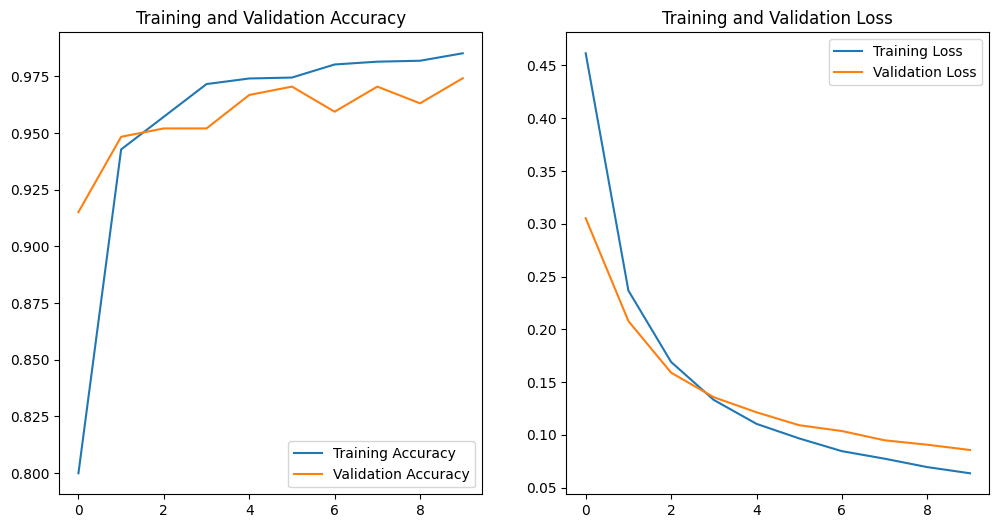

In [60]:
import matplotlib.pyplot as plt

# Get the accuracy and loss values from the history object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 6))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

2nd train

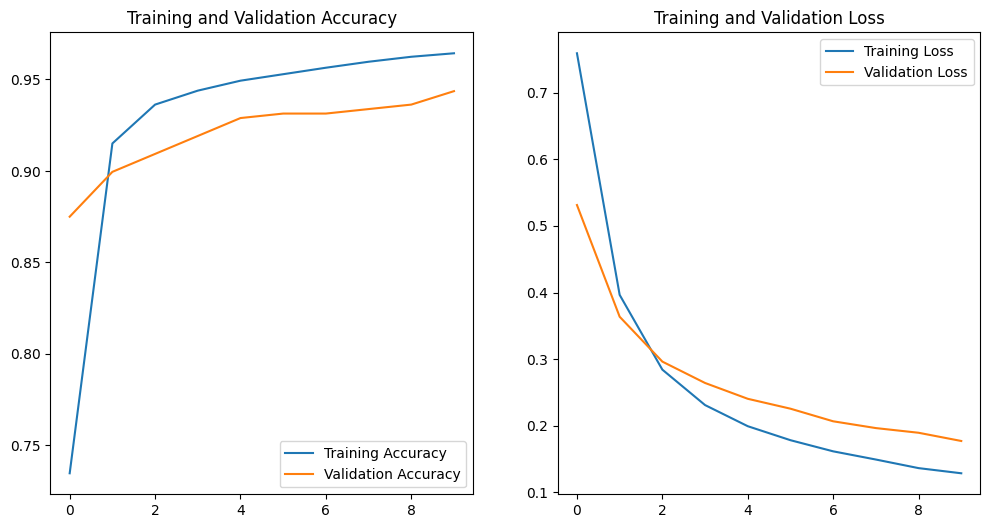

In [39]:
import matplotlib.pyplot as plt

# Get the accuracy and loss values from the history object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 6))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

3rd train

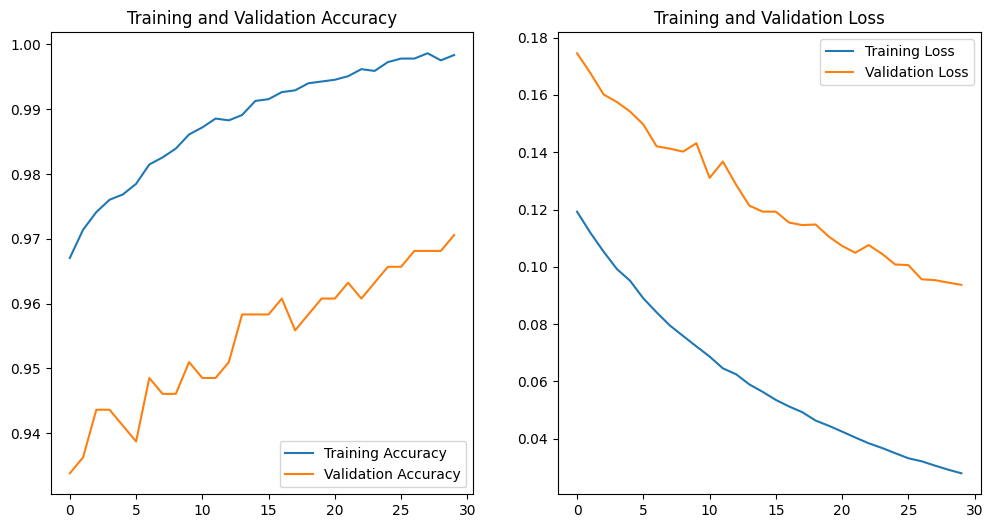

In [ ]:
import matplotlib.pyplot as plt
#overfitting
# Get the accuracy and loss values from the history object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 6))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Train1-Eval

In [ ]:
results = model.evaluate(val_images, val_labels, verbose=1)
#2
print(f"Validation Loss: {results[0]:.4f}")
print(f"Validation Accuracy: {results[1]:.4f}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 765ms/step - accuracy: 0.9549 - loss: 0.1633
Validation Loss: 0.1771
Validation Accuracy: 0.9436


Train2-Eval

In [45]:
results = model.evaluate(val_images, val_labels, verbose=1)
#3
print(f"Validation Loss: {results[0]:.4f}")
print(f"Validation Accuracy: {results[1]:.4f}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 783ms/step - accuracy: 0.9764 - loss: 0.0845
Validation Loss: 0.0937
Validation Accuracy: 0.9706


Train1-Model

In [63]:
# Define the filename for your saved model
model_filename = "InceptionV3_pothole_E10_LR-5.keras"

# Save the model
model.save(model_filename)

print(f"Model saved successfully as {model_filename}")

Model saved successfully as InceptionV3_pothole_E10_LR-5.keras


In [ ]:
# Define the filename for your saved model
model_filename = "InceptionV3_3_class_pothole_manhole_E10_LR-5.keras"

# Save the model
model.save(model_filename)

print(f"Model saved successfully as {model_filename}")

Model saved successfully as InceptionV3_3_class_pothole_manhole_E10_LR-5.keras


Started-Overfitting

In [ ]:
# Define the filename for your saved model
model_filename = "InceptionV3_3_class_pothole_manhole_E40_LR-5.keras"

# Save the model
model.save(model_filename)

print(f"Model saved successfully as {model_filename}")